<a href="https://colab.research.google.com/github/milkpotato1000/project_NVISIA/blob/main/s_knowledge_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 로드

In [1]:
import gdown
import pandas as pd
import numpy as np
import os

# Google Drive 파일 ID (공유 버튼을 눌러 해당 파일의 URL에서 추출한 파일 ID)
# > event_loc_normalized.csv
# https://drive.google.com/file/d/1kQ56rfUdRu0UUraC7DuYc3jfgZ69f3Jr/view?usp=drive_link
file_id = '1kQ56rfUdRu0UUraC7DuYc3jfgZ69f3Jr'
output_path = 'downloaded_file.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)
df = pd.read_csv(output_path) # 코랩~구글 드라이브 사용시

# 로컬에서 로드하는 경우, 경로 및 파일명 지정
# df = pd.read_csv('event_loc_normalized')

display(df.head())

Downloading...
From: https://drive.google.com/uc?id=1kQ56rfUdRu0UUraC7DuYc3jfgZ69f3Jr
To: /content/downloaded_file.csv
100%|██████████| 41.8M/41.8M [00:01<00:00, 36.2MB/s]


,id,title,contents,source,section,author,publish_date,url,category,summary,keywords,event_title,event_date,event_person,event_org,event_loc,p_rice(won/kg),p_corn(won/kg),p_usd(won/usd),job_cost
0,spnews_101404,"北, 신의주온실종합농장 건설장 지대정리·잔디심기 마감단계",북한 평안북도 신의주온실종합농장 건설장에서 방대한 면적의 지대정리와 잔디심기가 마감...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,신의주온실종합농장 건설장에서 지대정리와 잔디심기가 마감단계에 이르고 있다. 군민건설...,"신의주, 온실농장, 지대정리, 잔디심기, 건설",신의주온실종합농장 건설 마감단계,2025-11-17,NaN,NaN,평안북도 신의주시,NaN,NaN,NaN,0.000318
1,spnews_101403,"北, 나무 사름률 높이는 제품은?",북한이 나무의 사름률을 보장에 효과적인 과학기술제품으로 천연생물활성제 등이 있다고 ...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,북한이 나무의 사름률을 높이는 과학기술제품으로 천연생물활성제를 소개했다. 이 제품은...,"나무, 사름률, 천연생물활성제, 제품, 북한","북한, 나무 사름률 높이는 제품 소개",2025-11-17,NaN,NaN,NaN,NaN,NaN,NaN,0.000335
2,spnews_101402,"北 개성시, 식물방역소·돼지종축장 신축","북한 개성시에서 식물방역소와 돼지종축장 새로 건설했다.\n노동신문은 17일 ""개성시...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한 개성시에서 식물방역소와 돼지종축장이 새로 건설되었다. 개성시식물방역소 건설에 ...,"개성시, 식물방역소, 돼지종축장, 건설, 농업","개성시, 식물방역소와 돼지종축장 신축",2025-11-17,NaN,"개성시식물방역소, 시남새온실, 시유기질복합비료공장",개성시,NaN,NaN,NaN,0.000313
3,spnews_101394,"[北 물가] 가을 추수 영향, 곡물가 내림세",북한지역에서 가을 추수가 마무리 되면서 쌀과 옥수수 등 곡물류 가격이 내림세로 돌아...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,"가을 추수가 마무리되면서 북한의 곡물 가격이 하락세를 보이고 있다. 평양, 혜산, ...","곡물가, 하락, 가을 추수, 물가, 북한",가을 추수로 인한 곡물가 하락,2025-11-15,NaN,NaN,"강원도 원산시, 양강도 혜산시, 평양시, 황해북도 사리원시",19850.0,4500.0,34600.0,0.000379
4,spnews_101392,북한 각지서 어머니날 경축... 김일성-김정일 동상 참배,"북한 각지에서 어머니날(11월 16일)을 경축했다.\n노동신문은 17일 ""어머니날을...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한 각지에서 어머니날을 경축하며 김일성-김정일 동상에 꽃다발을 바쳤다. 공산주의어...,"어머니날, 경축, 동상, 공연, 여성근로자",어머니날 경축 행사,2025-11-16,NaN,NaN,"강원도, 개성시, 나선시, 양강도, 평안남도, 황해북도",NaN,NaN,NaN,0.000316


In [23]:
category_to_filter = '경제/산업'
sample_df = df[df['category'] == category_to_filter].head(10).copy()
display(sample_df.head())

,id,title,contents,source,section,author,publish_date,url,category,summary,keywords,event_title,event_date,event_person,event_org,event_loc,p_rice(won/kg),p_corn(won/kg),p_usd(won/usd),job_cost
0,spnews_101404,"北, 신의주온실종합농장 건설장 지대정리·잔디심기 마감단계",북한 평안북도 신의주온실종합농장 건설장에서 방대한 면적의 지대정리와 잔디심기가 마감...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,신의주온실종합농장 건설장에서 지대정리와 잔디심기가 마감단계에 이르고 있다. 군민건설...,"신의주, 온실농장, 지대정리, 잔디심기, 건설",신의주온실종합농장 건설 마감단계,2025-11-17,NaN,NaN,평안북도 신의주시,NaN,NaN,NaN,0.000318
1,spnews_101403,"北, 나무 사름률 높이는 제품은?",북한이 나무의 사름률을 보장에 효과적인 과학기술제품으로 천연생물활성제 등이 있다고 ...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,북한이 나무의 사름률을 높이는 과학기술제품으로 천연생물활성제를 소개했다. 이 제품은...,"나무, 사름률, 천연생물활성제, 제품, 북한","북한, 나무 사름률 높이는 제품 소개",2025-11-17,NaN,NaN,NaN,NaN,NaN,NaN,0.000335
3,spnews_101394,"[北 물가] 가을 추수 영향, 곡물가 내림세",북한지역에서 가을 추수가 마무리 되면서 쌀과 옥수수 등 곡물류 가격이 내림세로 돌아...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,"가을 추수가 마무리되면서 북한의 곡물 가격이 하락세를 보이고 있다. 평양, 혜산, ...","곡물가, 하락, 가을 추수, 물가, 북한",가을 추수로 인한 곡물가 하락,2025-11-15,NaN,NaN,"강원도 원산시, 양강도 혜산시, 평양시, 황해북도 사리원시",19850.0,4500.0,34600.0,0.000379
5,spnews_101391,"北, 첫 모내기 하는 평남 원화농장서 결산분배 실시",북한에서 해마다 첫 모내기를 하는 평안남도 원화농장에서 결산분배를 진행했다.\n노동...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,평안남도 원화농장에서 첫 모내기를 기념하여 결산분배가 진행되었다. 농장 일꾼들과 근...,"모내기, 결산분배, 원화농장, 농업, 평안남도",평안남도 원화농장에서 첫 모내기 결산분배 실시,2025-05-16,"리경철, 최영송","평안남도당위원회, 도농촌경리위원회",평안남도,NaN,NaN,NaN,0.000336
11,spnews_101374,"""北 기계공장, 지방공업공장에 보내줄 설비생산 마감""",북한 각지 기계공장에서 올해 새로 건설하는 지방공업공장에 보내줄 설비생산을 마쳤다고...,spnews,북한N,안윤석 대기자,2025-11-16,https://www.spnews.co.kr/news/articleView.html...,경제/산업,북한의 기계공장에서 새로 건설하는 지방공업공장에 보낼 설비생산을 완료했다. 여러 기...,"설비생산, 지방공업공장, 기계공장, 북한, 생산과제","북한 기계공장, 지방공업공장 설비생산 완료",2025-11-15,NaN,"구성공작기계공장, 만경대공작기계공장, 안주펌프공장, 원산통풍기공장, 평양채굴기계공장...",NaN,NaN,NaN,NaN,0.000361


### 전처리

In [24]:
def preprocess_korean_text(text):
    if not isinstance(text, str):
        return ''

    all_keywords = []
    for part in text.split(','):
        all_keywords.extend(part.strip().split())

    filtered_keywords = [word for word in all_keywords if word]

    return ' '.join(filtered_keywords)

sample_df['processed_keywords'] = sample_df['keywords'].apply(preprocess_korean_text)

display(sample_df[['keywords', 'processed_keywords']].head())
print("Updated 'preprocess_korean_text' function applied (stopwords not removed) and 'processed_keywords' column updated.")

,keywords,processed_keywords
0,"신의주, 온실농장, 지대정리, 잔디심기, 건설",신의주 온실농장 지대정리 잔디심기 건설
1,"나무, 사름률, 천연생물활성제, 제품, 북한",나무 사름률 천연생물활성제 제품 북한
3,"곡물가, 하락, 가을 추수, 물가, 북한",곡물가 하락 가을 추수 물가 북한
5,"모내기, 결산분배, 원화농장, 농업, 평안남도",모내기 결산분배 원화농장 농업 평안남도
11,"설비생산, 지방공업공장, 기계공장, 북한, 생산과제",설비생산 지방공업공장 기계공장 북한 생산과제


Updated 'preprocess_korean_text' function applied (stopwords not removed) and 'processed_keywords' column updated.


In [25]:
article_relationships = []

for i in range(len(sample_df)):
    for j in range(i + 1, len(sample_df)):
        article1 = sample_df.iloc[i]
        article2 = sample_df.iloc[j]

        keywords1 = set(article1['processed_keywords'].split())
        keywords2 = set(article2['processed_keywords'].split())

        common_keywords = list(keywords1.intersection(keywords2))

        if common_keywords:
            article_relationships.append((article1['id'], article2['id'], common_keywords))

print(f"Found {len(article_relationships)} relationships.")
print("First 5 relationships:")
for r in article_relationships[:5]:
    print(r)

Found 8 relationships.
First 5 relationships:
('spnews_101403', 'spnews_101394', ['북한'])
('spnews_101403', 'spnews_101374', ['북한'])
('spnews_101403', 'spnews_101350', ['제품'])
('spnews_101403', 'spnews_101347', ['북한'])
('spnews_101394', 'spnews_101374', ['북한'])


In [26]:
import networkx as nx

# 1. 비어있는 그래프 G를 생성합니다.
G = nx.Graph()

# 2. sample_df의 각 기사에 대해 'article' 타입의 노드를 그래프에 추가합니다.
for index, row in sample_df.iterrows():
    G.add_node(row['id'], type='article', title=row['title'])

# 3. sample_df['processed_keywords'] 컬럼에서 모든 고유한 키워드를 추출하여 'keyword' 타입의 노드를 그래프에 추가합니다.
all_keywords = set()
for keywords_str in sample_df['processed_keywords']:
    all_keywords.update(keywords_str.split())

for keyword in all_keywords:
    G.add_node(keyword, type='keyword')

# 4. 각 기사와 해당 기사의 'processed_keywords'에 포함된 키워드 사이에 엣지를 추가합니다.
for index, row in sample_df.iterrows():
    article_id = row['id']
    article_keywords = row['processed_keywords'].split()
    for keyword in article_keywords:
        if keyword:
            G.add_edge(article_id, keyword, type='ARTICLE_KEYWORD')

# 5. 이전에 생성된 article_relationships 리스트를 사용하여 공통 키워드를 공유하는 기사들 사이에 엣지를 추가합니다.
for id1, id2, common_keywords in article_relationships:
    if common_keywords:
        G.add_edge(id1, id2, type='SHARED_KEYWORD', common_keywords=common_keywords)

# 6. 생성된 그래프 G의 노드와 엣지 개수를 출력하여 확인합니다.
print(f"Total nodes in graph: {G.number_of_nodes()}")
print(f"Total edges in graph: {G.number_of_edges()}")

Total nodes in graph: 56
Total edges in graph: 59


### TF-IDF(키워드간 거리 산출)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Initialize TfidfVectorizer
# max_df can be set to ignore terms that appear in too many documents (e.g., common words)
# min_df can be set to ignore terms that appear in too few documents
vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to the processed_keywords and transform the text
tfidf_matrix = vectorizer.fit_transform(sample_df['processed_keywords'])

# Get feature names (keywords)
feature_names = vectorizer.get_feature_names_out()

# 3. Convert the sparse TF-IDF matrix to a dense pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=sample_df['id'])

print("TF-IDF matrix successfully created and converted to DataFrame.")
display(tfidf_df.head())


TF-IDF matrix successfully created and converted to DataFrame.


,가을,건설,결산분배,곡물가,과일가공공장,과학기술,과학자,관광기념품전시회,관광상품,기계공장,...,제품,지대정리,지방공업공장,천연생물활성제,추수,평안남도,프로그램,하락,현대화,황금열매
id,,,,,,,,,,,,,,,,,,,,,
spnews_101404,0.000000,0.447214,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
spnews_101403,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.416798,0.000000,0.000000,0.490297,0.000000,0.000000,0.0,0.000000,0.0,0.0
spnews_101394,0.428856,0.000000,0.000000,0.428856,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.428856,0.000000,0.0,0.428856,0.0,0.0
spnews_101391,0.000000,0.000000,0.460158,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.460158,0.0,0.000000,0.0,0.0
spnews_101374,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.474727,...,0.000000,0.000000,0.474727,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [28]:
import numpy as np

# 4. Iterate through all unique keywords and update keyword nodes in G
for keyword in feature_names:
    # Calculate global importance score for each keyword (e.g., max TF-IDF across all articles)
    # Check if the keyword exists in tfidf_df columns before trying to access it
    if keyword in tfidf_df.columns:
        global_tfidf_score = tfidf_df[keyword].max()
    else:
        global_tfidf_score = 0.0 # Should not happen if feature_names are from vectorizer of processed_keywords

    # Update the corresponding keyword node in the graph G
    # Ensure the node exists and is of type 'keyword'
    if G.has_node(keyword) and G.nodes[keyword]['type'] == 'keyword':
        G.nodes[keyword]['tfidf_score'] = global_tfidf_score

print("Keyword nodes in graph G updated with 'tfidf_score'.")

# Print an example of an updated keyword node's attributes to confirm
# Find a keyword that should have a score > 0
example_keyword_node = None
for node, attrs in G.nodes(data=True):
    if attrs['type'] == 'keyword' and 'tfidf_score' in attrs and attrs['tfidf_score'] > 0:
        example_keyword_node = node
        break

if example_keyword_node:
    print(f"Example keyword node '{example_keyword_node}' attributes: {G.nodes[example_keyword_node]}")
else:
    print("No keyword node with a TF-IDF score > 0 found.")

Keyword nodes in graph G updated with 'tfidf_score'.
Example keyword node '신의주' attributes: {'type': 'keyword', 'tfidf_score': 0.4472135954999579}


In [29]:
import numpy as np

# 5. Iterate through all existing edges in the graph G and assign weights
for u, v, data in G.edges(data=True):
    edge_type = data.get('type')

    if edge_type == 'ARTICLE_KEYWORD':
        article_id = u if G.nodes[u]['type'] == 'article' else v
        keyword = v if G.nodes[v]['type'] == 'keyword' else u

        # Retrieve TF-IDF score for this specific keyword in this article
        if article_id in tfidf_df.index and keyword in tfidf_df.columns:
            tfidf_score = tfidf_df.loc[article_id, keyword]
            G[u][v]['weight'] = tfidf_score
        else:
            G[u][v]['weight'] = 0.0 # Should not happen if data is consistent

    elif edge_type == 'SHARED_KEYWORD':
        article1_id = u
        article2_id = v
        common_keywords = data.get('common_keywords', [])
        total_weight = 0.0

        for kw in common_keywords:
            # Add TF-IDF of the keyword in article1
            if article1_id in tfidf_df.index and kw in tfidf_df.columns:
                total_weight += tfidf_df.loc[article1_id, kw]
            # Add TF-IDF of the keyword in article2
            if article2_id in tfidf_df.index and kw in tfidf_df.columns:
                total_weight += tfidf_df.loc[article2_id, kw]
        G[u][v]['weight'] = total_weight

print("Edge weights in graph G updated with TF-IDF scores.")

# 6. Print an example of an updated edge's attributes to confirm
example_edge_found = False
for u, v, data in G.edges(data=True):
    if 'weight' in data and data['weight'] > 0:
        print(f"Example edge ('{u}', '{v}') attributes: {data}")
        example_edge_found = True
        break

if not example_edge_found:
    print("No edge with a TF-IDF weight > 0 found.")

Edge weights in graph G updated with TF-IDF scores.
Example edge ('spnews_101404', '신의주') attributes: {'type': 'ARTICLE_KEYWORD', 'weight': np.float64(0.4472135954999579)}


### Louvain 색상 그루핑

In [30]:
from community import community_louvain
import collections

# 1. Install and import python-louvain library
# In a typical Colab environment, this might need to be run separately if not already installed:
!pip install python-louvain

# 2. Run Louvain community detection algorithm
partition = community_louvain.best_partition(G)

# 3. Add community information to each node as a 'community' attribute
for node, comm_id in partition.items():
    G.nodes[node]['community'] = comm_id

print("Louvain community detection applied and 'community' attribute added to nodes.")

# 4. Print the number of detected communities and node counts per community
num_communities = len(set(partition.values()))
community_sizes = collections.Counter(partition.values())

print(f"Total number of communities detected: {num_communities}")
print("Node counts per community:")
for comm_id, count in sorted(community_sizes.items()):
    print(f"  Community {comm_id}: {count} nodes")

Louvain community detection applied and 'community' attribute added to nodes.
Total number of communities detected: 6
Node counts per community:
  Community 0: 6 nodes
  Community 1: 11 nodes
  Community 2: 6 nodes
  Community 3: 17 nodes
  Community 4: 6 nodes
  Community 5: 10 nodes


### 그래프(TF-IDF만 적용)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


System font cache rebuilt.
Added font from /usr/share/fonts/truetype/nanum/NanumGothic.ttf to Matplotlib.
Matplotlib font manager reloaded.
Using font family: NanumGothic


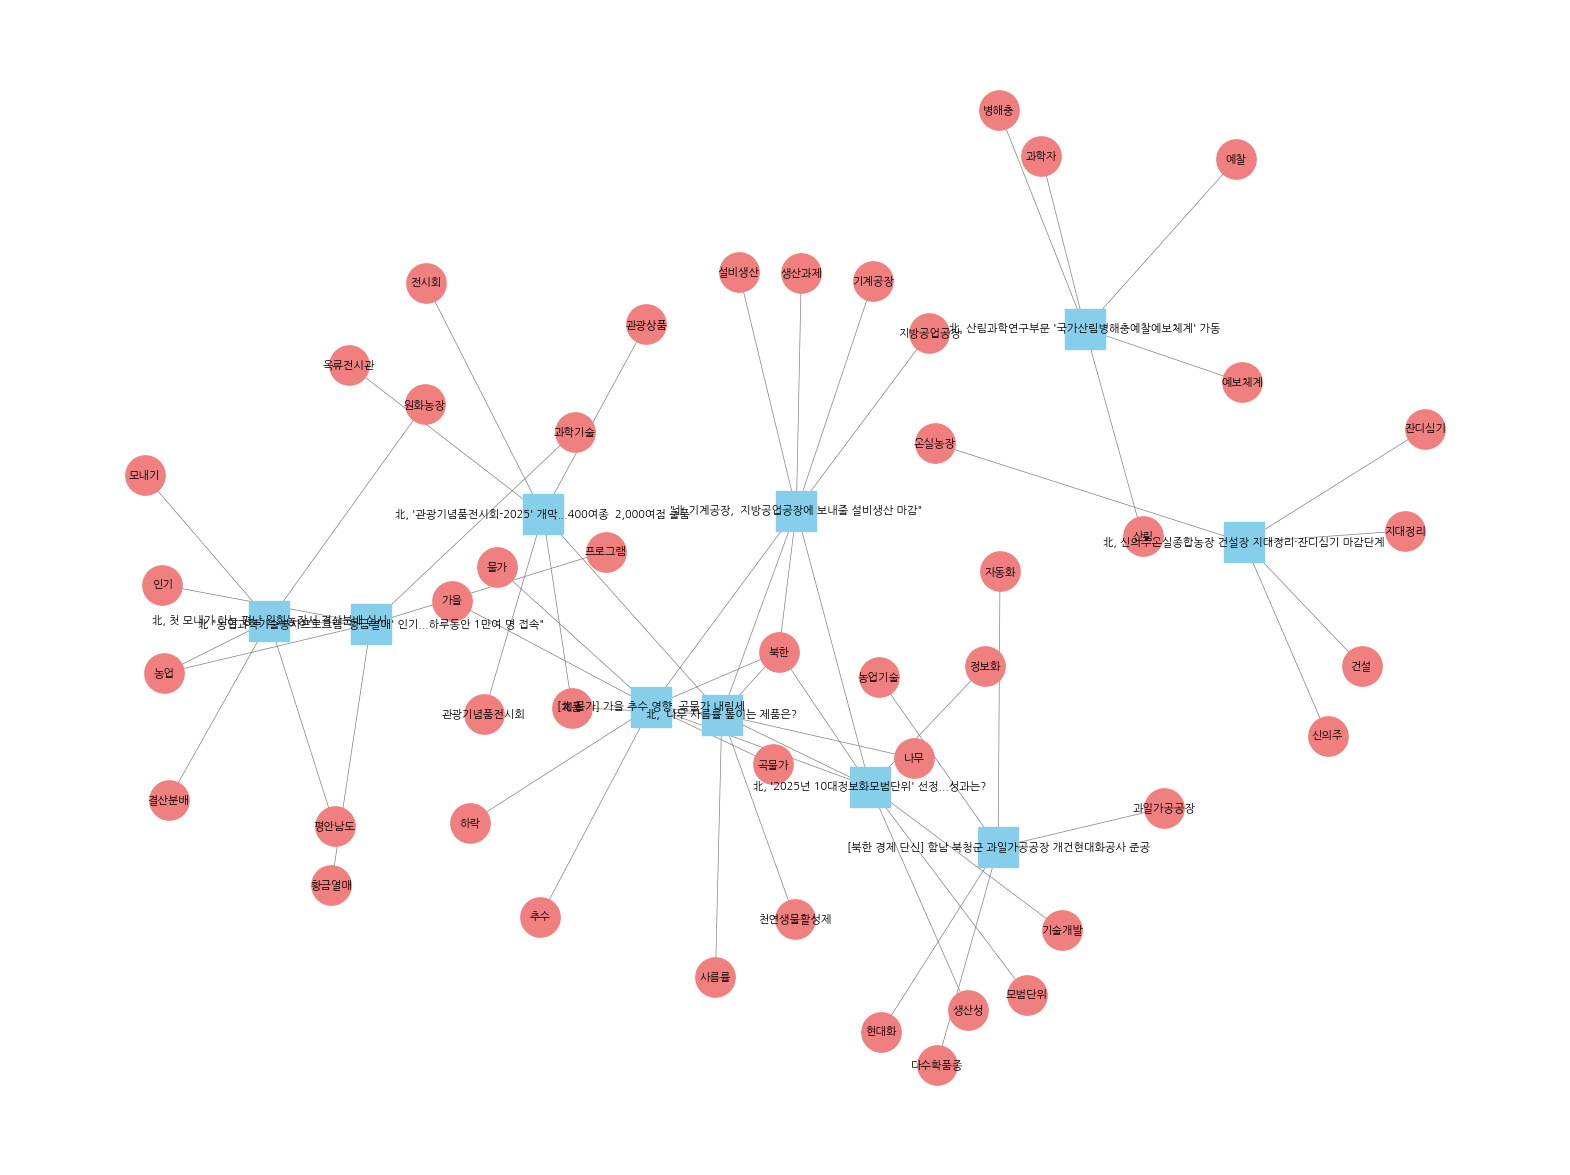

In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import os

# --- Font Setup (More robust approach for NanumGothic) ---
# 1. Install NanumGothic font
get_ipython().system('sudo apt-get update -qq > /dev/null')
get_ipython().system('sudo apt-get install -y fonts-nanum > /dev/null') # Install generic nanum fonts

# 2. Clear matplotlib cache aggressively
cache_dir = os.path.expanduser('~/.cache/matplotlib')
if os.path.exists(cache_dir):
    get_ipython().system(f'rm -rf {cache_dir}')
    print(f"Cleared matplotlib cache at {cache_dir}")

# 3. Ensure system font cache is updated
get_ipython().system('sudo fc-cache -fv > /dev/null')
print("System font cache rebuilt.")

# 4. Explicitly add NanumGothic font to matplotlib's font manager
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # Common path for NanumGothic
font_name = 'NanumGothic'

if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    print(f"Added font from {font_path} to Matplotlib.")
else:
    # Fallback to NanumGothicCoding if NanumGothic.ttf is not found directly
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
    font_name = 'NanumGothicCoding'
    if os.path.exists(font_path):
        fm.fontManager.addfont(font_path)
        print(f"Added font from {font_path} to Matplotlib (fallback to NanumGothicCoding).")
    else:
        print(f"Warning: Font file not found at {font_path}")

# 5. Reload Matplotlib's font manager (to ensure newly added fonts are recognized)
fm._load_fontmanager(try_read_cache=False)
print("Matplotlib font manager reloaded.")

# 6. Set font properties to use the chosen Nanum font
if font_name in fm.get_font_names(): # Check if the font is now recognized
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.sans-serif'] = [font_name] + [f for f in plt.rcParams['font.sans-serif'] if f != font_name]
    plt.rcParams['axes.unicode_minus'] = False # Prevent minus sign breaking
    print(f"Using font family: {font_name}")
else:
    print(f"Font '{font_name}' still not found after explicit addition/reload. Falling back to DejaVu Sans.")
    plt.rcParams['font.family'] = 'DejaVu Sans' # Fallback
    plt.rcParams['axes.unicode_minus'] = False # Prevent minus sign breaking


# --- Graph Visualization Code (Without Louvain communities) ---

# 노드를 유형별로 분리하고 해당 속성 리스트를 생성합니다.
article_nodes = []
keyword_nodes = []
article_labels = {}
keyword_labels = {}

# Define distinct colors for article and keyword nodes
article_node_color = 'skyblue'
keyword_node_color = 'lightcoral'

# ordered_nodelist는 G.nodes()의 순서를 유지합니다.
ordered_nodelist = list(G.nodes())

for node_id in ordered_nodelist:
    attributes = G.nodes[node_id]

    if attributes['type'] == 'article':
        article_nodes.append(node_id)
        article_labels[node_id] = attributes['title']
    elif attributes['type'] == 'keyword':
        keyword_nodes.append(node_id)
        keyword_labels[node_id] = node_id

plt.figure(figsize=(20, 15)) # 그래프 크기 조정
pos = nx.spring_layout(G, k=0.3, iterations=50, dim=2, seed=42) # k: 노드 간 거리, iterations: 레이아웃 계산 반복 횟수. 재현성을 위해 seed 추가

if not pos:
    print("오류: nx.spring_layout이 빈 위치 사전을 반환했습니다. 이는 그래프가 비어 있거나 문제가 있음을 의미할 수 있습니다.")
else:
    # 엣지를 먼저 그려 노드 뒤에 위치하도록 합니다.
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5)

    # 기사 노드 (사각형) 그리기
    if article_nodes:
        nx.draw_networkx_nodes(G, pos,
                               nodelist=article_nodes,
                               node_shape='s',
                               node_color=article_node_color,
                               node_size=800)
        nx.draw_networkx_labels(G, pos,
                                labels=article_labels,
                                font_size=8,
                                font_color='black',
                                font_weight='bold')

    # 키워드 노드 (원형) 그리기
    if keyword_nodes:
        nx.draw_networkx_nodes(G, pos,
                               nodelist=keyword_nodes,
                               node_shape='o',
                               node_color=keyword_node_color,
                               node_size=800)
        nx.draw_networkx_labels(G, pos,
                                labels=keyword_labels,
                                font_size=8,
                                font_color='black')

    # plt.title('Knowledge Graph (TF-IDF weighted)', size=20) # 제목 추가
    plt.axis('off') # 축 제거
    plt.show()

### 그래프(TF-DF+Louvain 적용)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


System font cache rebuilt.
Added font from /usr/share/fonts/truetype/nanum/NanumGothic.ttf to Matplotlib.
Matplotlib font manager reloaded.
Using font family: NanumGothic


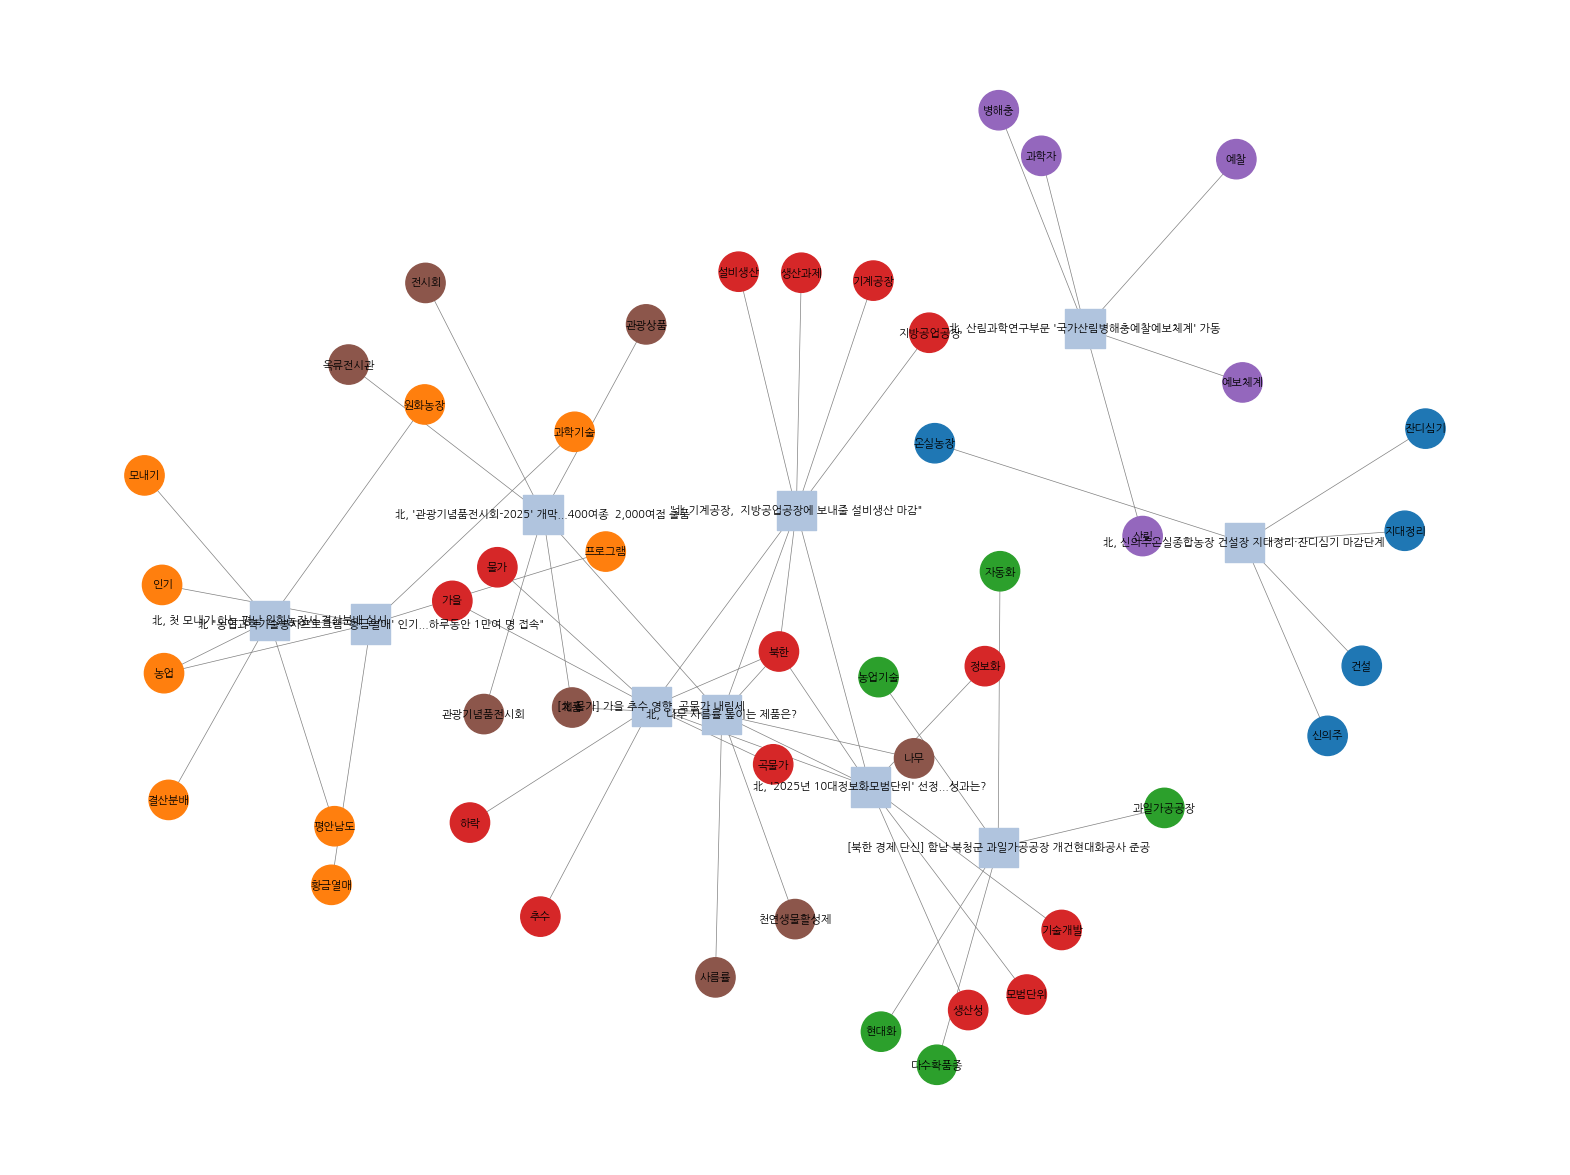

In [32]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import os

# --- Font Setup (More robust approach for NanumGothic) ---
# 1. Install NanumGothic font
get_ipython().system('sudo apt-get update -qq > /dev/null')
get_ipython().system('sudo apt-get install -y fonts-nanum > /dev/null') # Install generic nanum fonts

# 2. Clear matplotlib cache aggressively
cache_dir = os.path.expanduser('~/.cache/matplotlib')
if os.path.exists(cache_dir):
    get_ipython().system(f'rm -rf {cache_dir}')
    print(f"Cleared matplotlib cache at {cache_dir}")

# 3. Ensure system font cache is updated
get_ipython().system('sudo fc-cache -fv > /dev/null')
print("System font cache rebuilt.")

# 4. Explicitly add NanumGothic font to matplotlib's font manager
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # Common path for NanumGothic
font_name = 'NanumGothic'

if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    print(f"Added font from {font_path} to Matplotlib.")
else:
    # Fallback to NanumGothicCoding if NanumGothic.ttf is not found directly
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
    font_name = 'NanumGothicCoding'
    if os.path.exists(font_path):
        fm.fontManager.addfont(font_path)
        print(f"Added font from {font_path} to Matplotlib (fallback to NanumGothicCoding).")
    else:
        print(f"Warning: Font file not found at {font_path}")

# 5. Reload Matplotlib's font manager (to ensure newly added fonts are recognized)
fm._load_fontmanager(try_read_cache=False)
print("Matplotlib font manager reloaded.")

# 6. Set font properties to use the chosen Nanum font
if font_name in fm.get_font_names(): # Check if the font is now recognized
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.sans-serif'] = [font_name] + [f for f in plt.rcParams['font.sans-serif'] if f != font_name]
    plt.rcParams['axes.unicode_minus'] = False # Prevent minus sign breaking
    print(f"Using font family: {font_name}")
else:
    print(f"Font '{font_name}' still not found after explicit addition/reload. Falling back to DejaVu Sans.")
    plt.rcParams['font.family'] = 'DejaVu Sans' # Fallback
    plt.rcParams['axes.unicode_minus'] = False # Prevent minus sign breaking


# --- Graph Visualization Code ---
# 7. 노드 레이블, 모양, 텍스트 색상 및 커뮤니티 색상을 설정합니다.

# 감지된 고유 커뮤니티 수를 가져옵니다.
num_communities = len(set(partition.values()))

# 커뮤니티를 위한 색상 맵을 생성합니다.
# matplotlib의 컬러맵을 사용하여 각 커뮤니티에 대해 다른 색상을 얻습니다.
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
community_colors = {comm_id: colors[i % len(colors)] for i, comm_id in enumerate(sorted(set(partition.values())))}

# 노드를 유형별로 분리하고 해당 속성 리스트를 생성합니다.
article_nodes = []
keyword_nodes = []
article_labels = {}
keyword_labels = {}
article_colors = []
keyword_colors = []

# ordered_nodelist는 G.nodes()의 순서를 유지합니다.
ordered_nodelist = list(G.nodes())

for node_id in ordered_nodelist:
    attributes = G.nodes[node_id]
    comm_id = attributes.get('community', -1)
    node_color = community_colors.get(comm_id, 'gray')

    if attributes['type'] == 'article':
        article_nodes.append(node_id)
        article_labels[node_id] = attributes['title']
        article_colors.append('lightsteelblue') # Modified: Unified color for article nodes
    elif attributes['type'] == 'keyword':
        keyword_nodes.append(node_id)
        keyword_labels[node_id] = node_id
        keyword_colors.append(node_color)

# --- Graph Visualization Code (updated) ---
plt.figure(figsize=(20, 15)) # 그래프 크기 조정
pos = nx.spring_layout(G, k=0.3, iterations=50, dim=2, seed=42) # k: 노드 간 거리, iterations: 레이아웃 계산 반복 횟수. 재현성을 위해 seed 추가

if not pos:
    print("오류: nx.spring_layout이 빈 위치 사전을 반환했습니다. 이는 그래프가 비어 있거나 문제가 있음을 의미할 수 있습니다.")
else:
    # 엣지를 먼저 그려 노드 뒤에 위치하도록 합니다.
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5)

    # 기사 노드 (사각형) 그리기
    if article_nodes:
        nx.draw_networkx_nodes(G, pos,
                               nodelist=article_nodes,
                               node_shape='s',
                               node_color=article_colors,
                               node_size=800)
        nx.draw_networkx_labels(G, pos,
                                labels=article_labels,
                                font_size=8,
                                font_color='black',
                                font_weight='bold')

    # 키워드 노드 (원형) 그리기
    if keyword_nodes:
        nx.draw_networkx_nodes(G, pos,
                               nodelist=keyword_nodes,
                               node_shape='o',
                               node_color=keyword_colors,
                               node_size=800)
        nx.draw_networkx_labels(G, pos,
                                labels=keyword_labels,
                                font_size=8,
                                font_color='black')

    # plt.title('Knowledge Graph with Louvain Communities', size=20) # 제목 추가
    plt.axis('off') # 축 제거
    plt.show()